## Import 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols      
from statsmodels.stats.anova import anova_lm 
from statsmodels.graphics.factorplots import interaction_plot
import pingouin as pg
sns.set()

In [2]:
# For Bold printing
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

## PROBLEM 1:

Salary is hypothesized to depend on educational qualification and occupation. To understand the dependency, the salaries of 40 individuals [SalaryData.csv] are collected and each person’s educational qualification and occupation are noted. Educational qualification is at three levels, High school graduate, Bachelor, and Doctorate. Occupation is at four levels, Administrative and clerical, Sales, Professional or specialty, and Executive or managerial. A different number of observations are in each level of education – occupation combination.

 [Assume that the data follows a normal distribution. In reality, the normality assumption may not always hold if the sample size is small.]

### Import file

In [3]:
salary1  = pd.read_csv("D:\\my files\\Advance stats\\SalaryData.csv")
salary1.head()

Education     Occupation  Salary
0   Doctorate   Adm-clerical  153197
1   Doctorate   Adm-clerical  115945
2   Doctorate   Adm-clerical  175935
3   Doctorate   Adm-clerical  220754
4   Doctorate          Sales  170769

In [4]:
salary1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 704.0+ bytes


In [5]:
salary1.describe(include='all').T

count unique              top freq    mean      std    min  \
Education     40      3        Doctorate   16     NaN      NaN    NaN   
Occupation    40      4   Prof-specialty   13     NaN      NaN    NaN   
Salary        40    NaN              NaN  NaN  162187  64860.4  50103   

                25%     50%     75%     max  
Education       NaN     NaN     NaN     NaN  
Occupation      NaN     NaN     NaN     NaN  
Salary      99897.5  169100  214441  260151

## 1.1 State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.

* For “Education” Compound:
   * H0: µ1 = µ2 = µ3. The mean hours of relief provided by Education are the same.
   * HA: all population means are equal, for at least one pair of Education
* For “Occupation” Compound:
  * H0: µ1 = µ2 = µ3. The mean hours of relief provided by Occupation are the same.
  * HA: all population means are equal, for at least one pair of Occupation

In [6]:
!pip install pingouin
# for anova formule install

## 1.2  Perform one-way ANOVA for Education with respect to the variable ‘Salary’. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

In [7]:
aov1 = pg.anova(dv= 'Salary', between= 'Education', data=salary1, detailed=True)
aov1   

Source            SS  DF            MS         F         p-unc       np2
0  Education  1.026955e+11   2  5.134773e+10  30.95628  1.257709e-08  0.625932
1     Within  6.137256e+10  37  1.658718e+09       NaN           NaN       NaN

In [8]:
1.257709e-08<0.05

True

* Since the p value is less than the significance level, we can reject the null hypothesis.

## 1.3  Perform one-way ANOVA for variable Occupation with respect to the variable ‘Salary’. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

In [9]:
aov2 = pg.anova(dv= 'Salary', between= 'Occupation', data=salary1, detailed=True)
aov2

Source            SS  DF            MS         F     p-unc       np2
0  Occupation  1.125878e+10   3  3.752928e+09  0.884144  0.458508  0.068623
1      Within  1.528092e+11  36  4.244701e+09       NaN       NaN       NaN

In [10]:
0.458508<0.05

False

* Since the p value is grater than the significance level, we can't reject the null hypothesis.

 ## 1.5  What is the interaction between the two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.

In [11]:
model = ols("Salary~ C(Occupation)+C(Education)",data=salary1).fit()
aov_table = anova_lm(model)
(aov_table)

df        sum_sq       mean_sq          F        PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09   2.284576  9.648715e-02
C(Education)    2.0  9.695663e+10  4.847831e+10  29.510933  3.708479e-08
Residual       34.0  5.585261e+10  1.642724e+09        NaN           NaN

### Let us check whether there is any interaction effect between the treatments

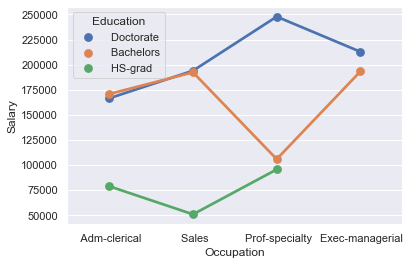

In [12]:
sns.pointplot(x='Occupation', y='Salary', data=salary1, hue='Education',ci=None);

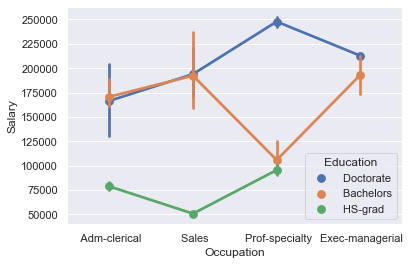

In [13]:
sns.pointplot(x='Occupation', y='Salary', data=salary1, hue='Education',);

### drawing an interaction plot

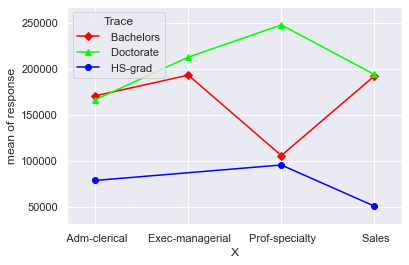

In [14]:
interaction_plot(np.array(salary1['Occupation']),np.array(salary1['Education']),np.array(salary1['Salary']),markers=['D','^','o']);

## 1.6 Perform a two-way ANOVA based on the Education and Occupation (along with their interaction Education*Occupation) with the variable ‘Salary’. State the null and alternative hypotheses and state your results. How will you interpret this result?

In [15]:
formula = 'Salary ~ C(Occupation) + C(Education) + C(Occupation):C(Education)'
model = ols(formula, salary1).fit()
aov_table = anova_lm(model)
(aov_table)

df        sum_sq       mean_sq          F  \
C(Occupation)                3.0  1.125878e+10  3.752928e+09   5.277862   
C(Education)                 2.0  9.695663e+10  4.847831e+10  68.176603   
C(Occupation):C(Education)   6.0  3.523330e+10  5.872217e+09   8.258287   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Occupation)               4.993238e-03  
C(Education)                1.090908e-11  
C(Occupation):C(Education)  2.913740e-05  
Residual                             NaN

In [16]:
printmd('**P-value of Occupation:**')
4.993238e-03*100<0.05

**P-value of Occupation:**

False

In [17]:
printmd('**P-value of Education:**')
1.090908e-11*100<0.05

**P-value of Education:**

True

In [18]:
printmd('**P-value of Occupation:Occupation:**')
2.913740e-05*100<0.05

**P-value of Occupation:Occupation:**

True

we can see that there is some sort of interaction between the two treatments. So, we will introduce a new term while performing the Two Way ANOVA.

Due to the inclusion of the interaction effect term, we can see a slight change in the p-value of the first two treatments as compared to the Two-Way ANOVA without the interaction effect terms.And we see that the p-value of the interaction effect term of 'Education' and 'Occupation' suggests that the Null Hypothesis is rejected in this case.

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     20.17
Date:                Sun, 16 May 2021   Prob (F-statistic):           1.82e-10
Time:                        22:52:34   Log-Likelihood:                -457.97
No. Observations:                  40   AIC:                             937.9
Df Residuals:                      29   BIC:                             956.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
Intercept                                                     1.707e+05   1.54e+04     11.088      0.000    1.39e+05    2.02e+05
C(Occupation)[T. Exec-managerial]                             2.249e+04   2.04e+04      1.104      0.279   -1.92e+04    6.41e+04
C(Occupation)[T. Prof-specialty]                             -6.492e+04   2.04e+04     -3.188      0.003   -1.07e+05   -2.33e+04
C(Occupation)[T. Sales]                                       2.159e+04   2.04e+04      1.060      0.298   -2.01e+04    6.32e+04
C(Education)[T. Doctorate]                                   -4253.2500   2.04e+04     -0.209      0.836   -4.59e+04    3.74e+04
C(Education)[T. HS-grad]                                     -9.195e+04   2.18e+04     -4.223      0.000   -1.36e+05   -4.74e+04
C(Occupation)[T. Exec-managerial]:C(Education)[T. Doctorate]  2.383e+04   3.61e+04      0.660      0.514      -5e+04    9.77e+04
C(Occupation)[T. Prof-specialty]:C(Education)[T. Doctorate]   1.462e+05   2.67e+04      5.484      0.000    9.17e+04    2.01e+05
C(Occupation)[T. Sales]:C(Education)[T. Doctorate]            5869.1000   2.71e+04      0.217      0.830   -4.96e+04    6.13e+04
C(Occupation)[T. Exec-managerial]:C(Education)[T. HS-grad]    3.417e-10   6.11e-11      5.596      0.000    2.17e-10    4.67e-10
C(Occupation)[T. Prof-specialty]:C(Education)[T. HS-grad]      8.17e+04   2.98e+04      2.740      0.010    2.07e+04    1.43e+05
C(Occupation)[T. Sales]:C(Education)[T. HS-grad]             -4.953e+04   2.98e+04     -1.661      0.107   -1.11e+05    1.14e+04
==============================================================================
Omnibus:                        7.354   Durbin-Watson:                   2.514
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                6.580
Skew:                           0.686   Prob(JB):                       0.0373
Kurtosis:                       4.437   Cond. No.                     6.92e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.28e-34. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## PROBLEM 2:
* The dataset Education - Post 12th Standard.csv is a dataset which contains the names of various colleges. This particular case study is based on various parameters of various institutions. You are expected to do Principal Component Analysis for this case study according to the instructions given in the following rubric. The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: Data Dictionary.xlsx.

In [20]:
edu  = pd.read_csv("D:\\my files\\Advance stats\\Education Post 12th Standard.csv")
edu.head()

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

## Inference:
* All values are properly loaded.

In [21]:
edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [22]:
printmd('**Total Number of Null values:**')
edu.isnull().sum().sum()

**Total Number of Null values:**

0

## Inference
* There are no Null values in the dataset
* Out of the 18 variables:
* 1 variable is object type
* 1 variable is float64 type
* 16 variables are int64 type
* After studying the data dictionary provided for the dataset and the above information, it may be inferred that each of the variables are correctly represented by the corresponding data types and thus there seems to be no presence of out of context values in the variables.

In [23]:
printmd('**Number of duplicate Rows:**')
edu.duplicated().sum()

**Number of duplicate Rows:**

0

## Inference
* There are no duplicate rows present

In [24]:
printmd('**Describing the Object type Names variable:**')
edu.Names.describe()

**Describing the Object type Names variable:**

count                   777
unique                  777
top       DePauw University
freq                      1
Name: Names, dtype: object

In [25]:
printmd('**Describing the Numerical Variables:**')
edu.describe().T

**Describing the Numerical Variables:**

count          mean          std     min     25%     50%  \
Apps         777.0   3001.638353  3870.201484    81.0   776.0  1558.0   
Accept       777.0   2018.804376  2451.113971    72.0   604.0  1110.0   
Enroll       777.0    779.972973   929.176190    35.0   242.0   434.0   
Top10perc    777.0     27.558559    17.640364     1.0    15.0    23.0   
Top25perc    777.0     55.796654    19.804778     9.0    41.0    54.0   
F.Undergrad  777.0   3699.907336  4850.420531   139.0   992.0  1707.0   
P.Undergrad  777.0    855.298584  1522.431887     1.0    95.0   353.0   
Outstate     777.0  10440.669241  4023.016484  2340.0  7320.0  9990.0   
Room.Board   777.0   4357.526384  1096.696416  1780.0  3597.0  4200.0   
Books        777.0    549.380952   165.105360    96.0   470.0   500.0   
Personal     777.0   1340.642214   677.071454   250.0   850.0  1200.0   
PhD          777.0     72.660232    16.328155     8.0    62.0    75.0   
Terminal     777.0     79.702703    14.722359    24.0    71.0    82.0   
S.F.Ratio    777.0     14.089704     3.958349     2.5    11.5    13.6   
perc.alumni  777.0     22.743887    12.391801     0.0    13.0    21.0   
Expend       777.0   9660.171171  5221.768440  3186.0  6751.0  8377.0   
Grad.Rate    777.0     65.463320    17.177710    10.0    53.0    65.0   

                 75%      max  
Apps          3624.0  48094.0  
Accept        2424.0  26330.0  
Enroll         902.0   6392.0  
Top10perc       35.0     96.0  
Top25perc       69.0    100.0  
F.Undergrad   4005.0  31643.0  
P.Undergrad    967.0  21836.0  
Outstate     12925.0  21700.0  
Room.Board    5050.0   8124.0  
Books          600.0   2340.0  
Personal      1700.0   6800.0  
PhD             85.0    103.0  
Terminal        92.0    100.0  
S.F.Ratio       16.5     39.8  
perc.alumni     31.0     64.0  
Expend       10830.0  56233.0  
Grad.Rate       78.0    118.0

## Inference
* All the college names are unique as observed from 'Names' variable.
* Observing the difference between the mean and median, it may be inferred that some of the variables look highly skewed like 'Apps', 'Accept', 'Enroll', 'F.Undergrad' etc. This is expected as some colleges are expected to have greater number of applications, more Enrollment etc. Further analysis is done during univariate analysis.
## Understanding the Dataset:
* The Dataset includes 777 colleges and the information about these colleges is explained by the following attributes:
Names: Names of various university and colleges 2. Apps: Number of applications received 3. Accept: Number of applications accepted 4. Enroll: Number of new students enrolled 5. Top10perc: Percentage of new students from top 10% of Higher Secondary class 6. Top25perc: Percentage of new students from top 25% of Higher Secondary class 7. F.Undergrad: Number of full-time undergraduate students 8. P.Undergrad: Number of part-time undergraduate students 9. Outstate: Number of students for whom the particular college or university is Out-of-state tuition 10. Room.Board: Cost of Room and board 11. Books: Estimated book costs for a student
* Personal: Estimated personal spending for a student 13. PhD: Percentage of faculties with Ph.D.’s 14. Terminal: Percentage of faculties with terminal degree 15. S.F.Ratio: Student/faculty ratio 16. perc.alumni: Percentage of alumni who donate 17. Expend: The Instructional expenditure per student 18. Grad.Rate: Graduation rate
Dropping the 'Names' variable as it won't be necessary in our analysis:

## Dropping the 'Names' variable as it won't be necessary in our analysis:

In [26]:
edu.drop('Names', axis = 1, inplace = True)

## 2.1 Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA?

## Univariate Analysis

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

**Histogram Plots of all the Numerical Variables:**

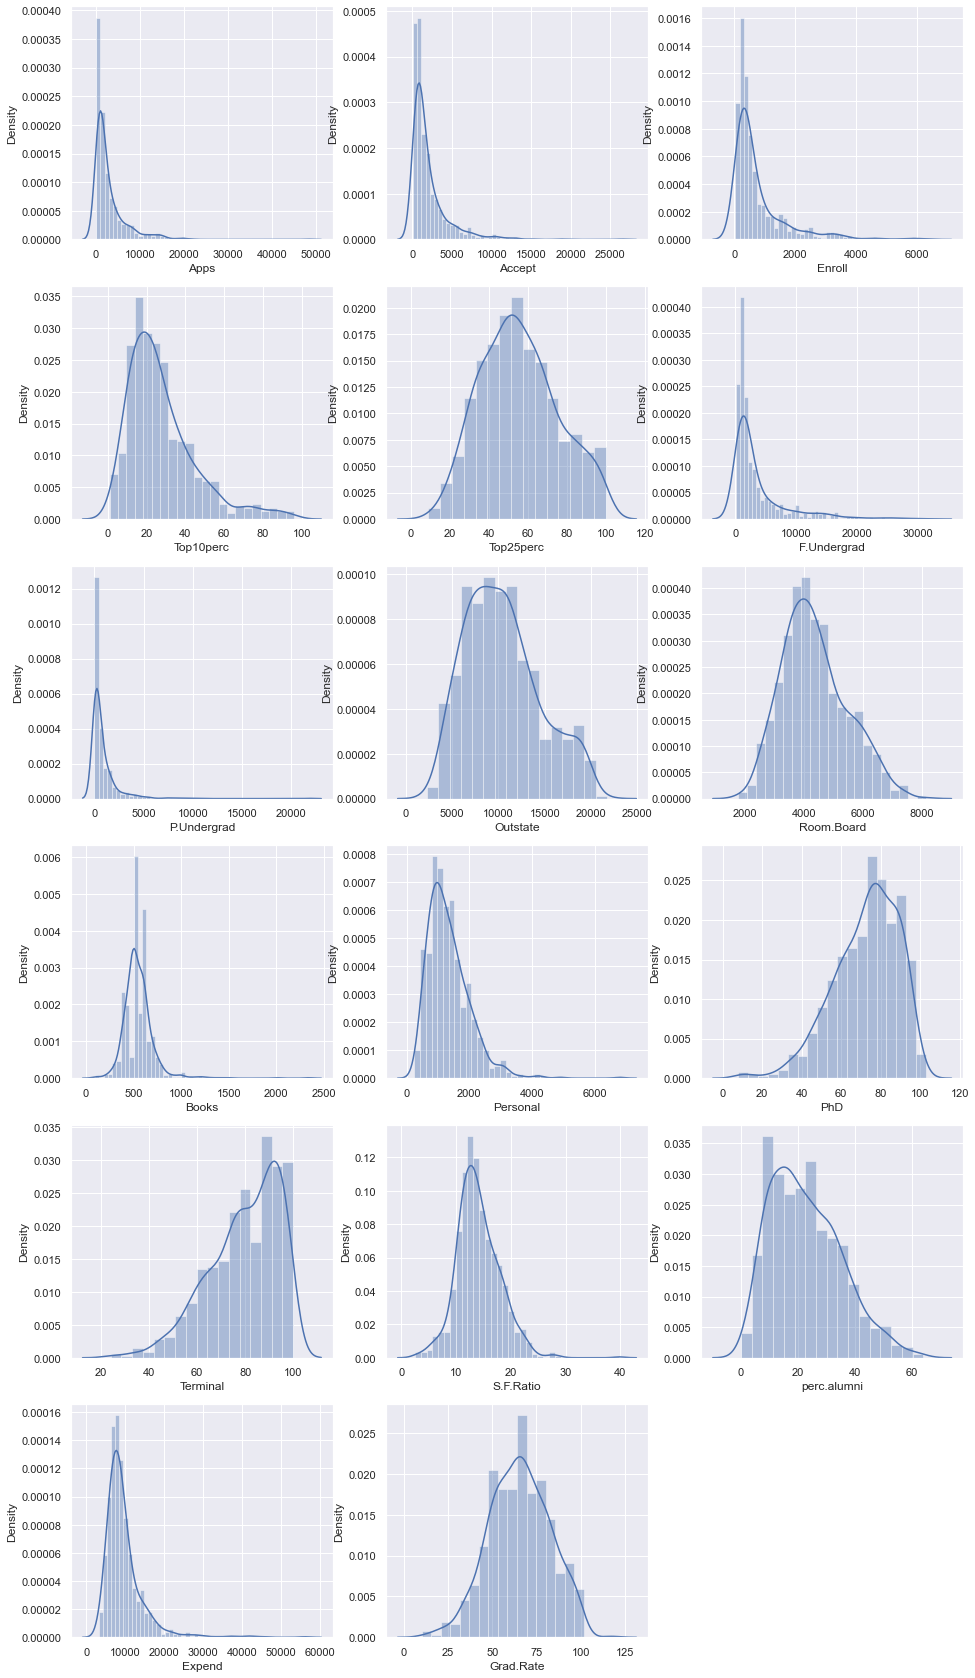

In [27]:
column_names = np.array(edu.columns.tolist())
plt.figure(figsize=(16,30))
for i in range(0,17):
    plt.subplot(6,3,i+1)
    sns.distplot(edu[column_names[i]]);
printmd('**Histogram Plots of all the Numerical Variables:**')

## Multivariate Analysis

**Pairwise scatter plot between the variables :**

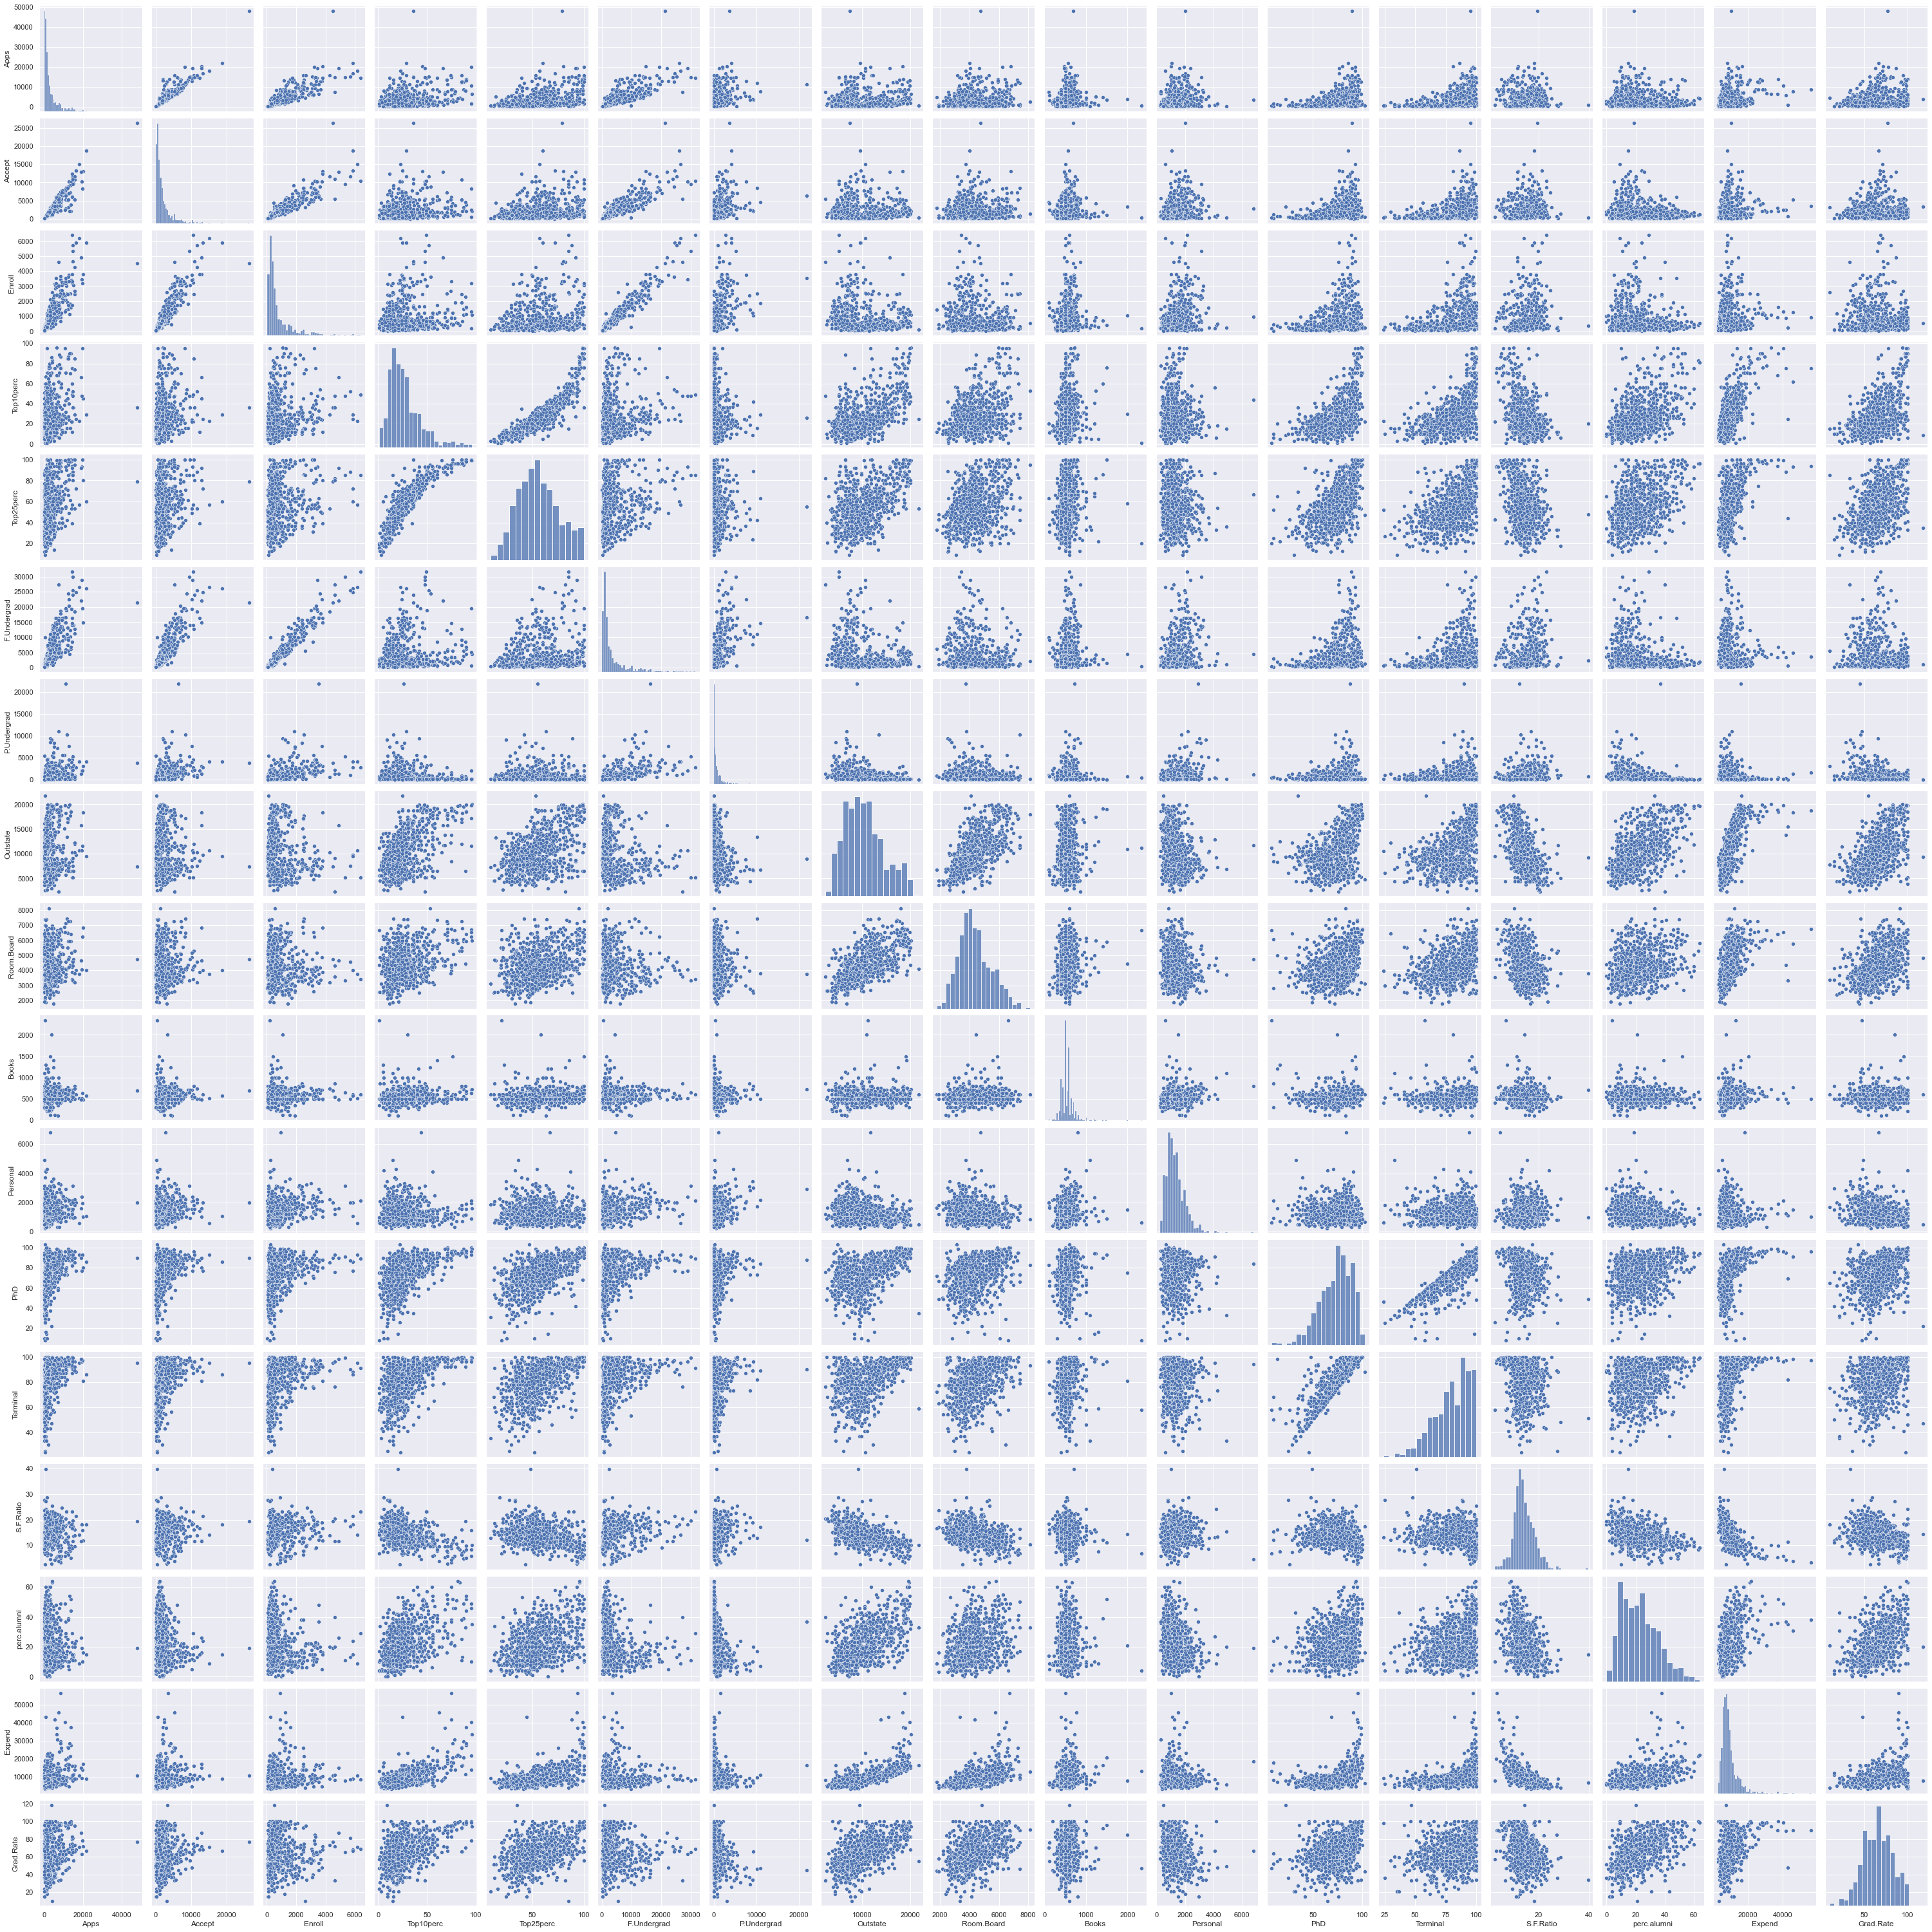

In [28]:
sns.pairplot(edu)
printmd('**Pairwise scatter plot between the variables :**')

## Inference:

* Since the pairplot output has too many plots, hence the output is not clear, so we will observe some the scatter plots after looking for interesection correlations in the correlation matrix and heatmap.

## Inference from Histograms:

## By observing the Histograms, the following observations are made:
The Variables which look nearly normally distributed are as follows:
'Grad.Rate', 'Top25perc', 'Outstate'.
This means that most of the colleges are within a range of values corresponding to the individual variables and few colleges are outside this range and nearly symmetrically placed on either side of the range.
The Variables which look right skewed are as follows:
'Apps', 'Accept', 'Enroll', 'F.Undergrad', 'P.Undergrad', 'Personal', 'Expend', 'Room.Board', 'S.F.Ratio', 'Top10perc', 'perc.alumni'.
This right skewness may be observed because only a few colleges have higher values for the corresponding variables and most of the other colleges have low values.
The Variables which look left skewed are as follows:
'PhD', 'Terminal'.
This is observed because there are only few colleges which have less percentage of faculties with PhD or Terminal degrees.
'Books' look bimodal. This means that the books expenses beared by students fall mainly in two ranges for most of the colleges.

In [29]:
printmd('**Skewness of the different variables in descending order of positive skewness:**')
edu.skew().sort_values(ascending = False)

**Skewness of the different variables in descending order of positive skewness:**

P.Undergrad    5.692353
Apps           3.723750
Books          3.485025
Expend         3.459322
Accept         3.417727
Enroll         2.690465
F.Undergrad    2.610458
Personal       1.742497
Top10perc      1.413217
S.F.Ratio      0.667435
perc.alumni    0.606891
Outstate       0.509278
Room.Board     0.477356
Top25perc      0.259340
Grad.Rate     -0.113777
PhD           -0.768170
Terminal      -0.816542
dtype: float64

## Inference:

- The maximum positive skewness is observed for 'P.Undergrad' variable.
- A positive skewness of greater than 1 is observed for 9 variables.
- Least skewness is observed for 'Grad.Rate'.
- The highest negative skewness is observed for 'Terminal' variable, 'PhD' variable also has nearly same negative skewness value.

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

**Cumulative Distribution of all the Numerical Variables:**

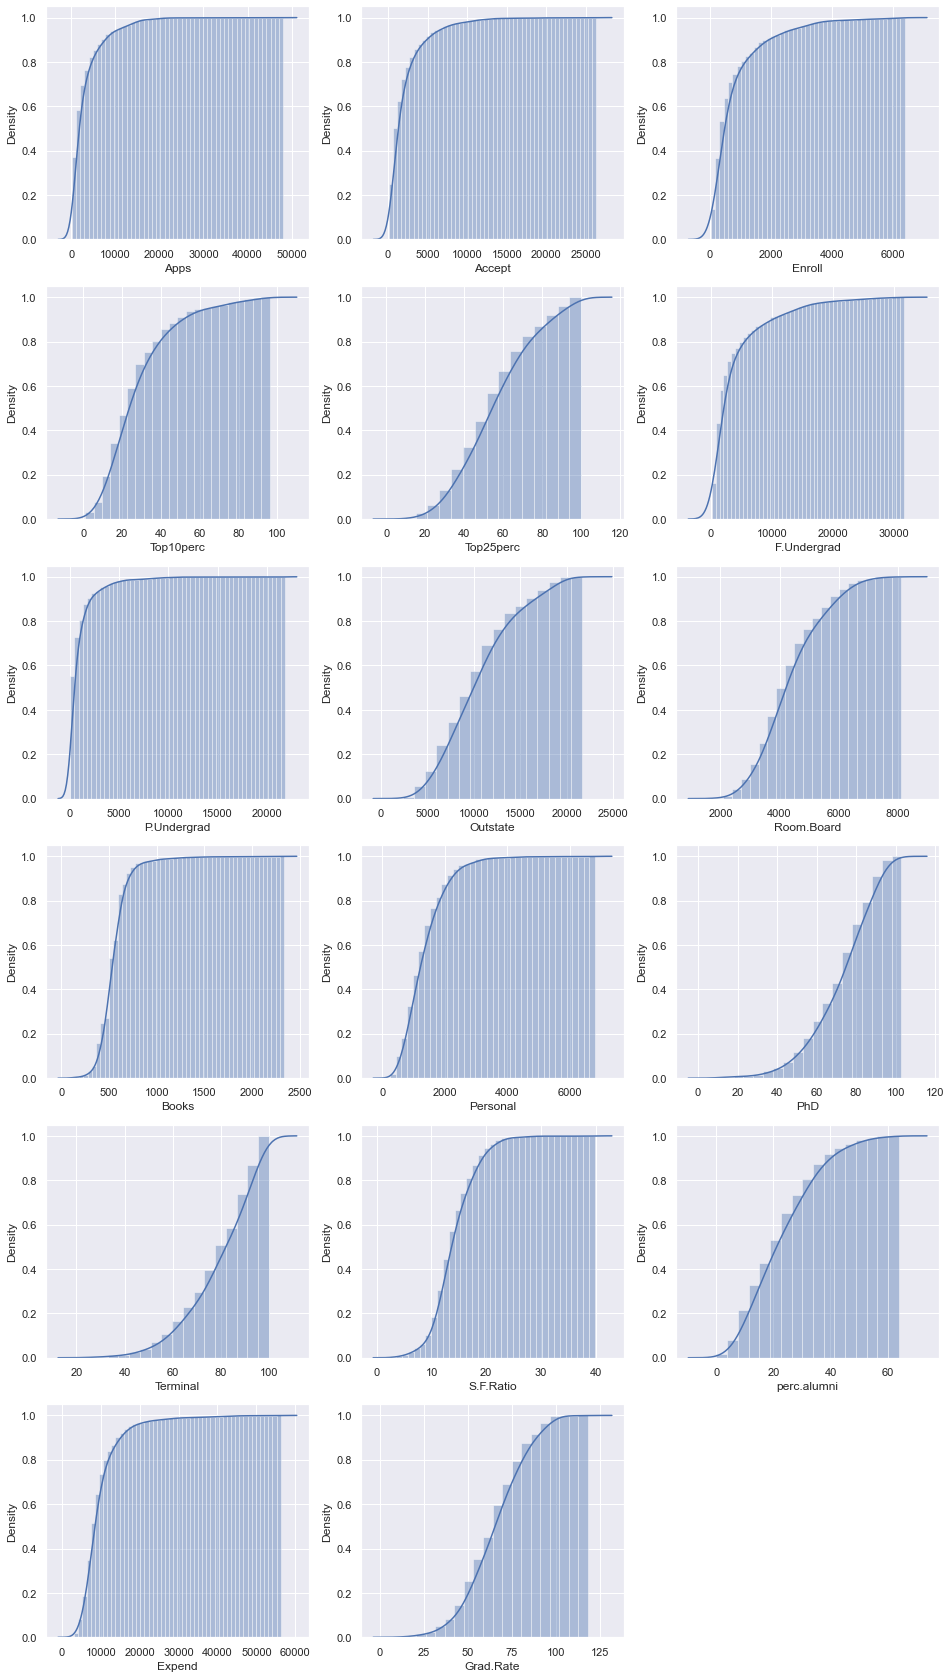

In [30]:
column_names = np.array(edu.columns.tolist());
plt.figure(figsize=(16,30));
for i in range(0,17):
    plt.subplot(6,3,i+1);
    sns.distplot(edu[column_names[i]], hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True));
printmd('**Cumulative Distribution of all the Numerical Variables:**');

## Inference:

* Very high slope is observed for variables 'Apps', 'Accept', 'Enroll', 'F.Undergrad', 'P.Undergrad', 'Books', 'Expend'. This means that most of the colleges have very low values for these variables and few colleges have higher values.
* Moderately high slope is observed for variables 'Top10perc', 'Top25perc', 'Outstate', 'Room.Board', 'Personal', 'S.F.Ratio', 'perc.alumni', 'Grad.Rate'. This means most of colleges have low to moderate values for these variables and a few colleges have higher values.
* Moderate slope is observed for variables 'PhD', 'Terminal'. This means nearly most of the colleges have moderate to high values for these variables and a few colleges have low values.

## 2.2 Is scaling necessary for PCA in this case? Give justification and perform scaling.

The dataset contains certain variables which are counts like 'Apps' having a mean value of 3001 approx and variables like 'Expend' which are expressed in currency units having a mean value of 9660 approx whereas there are certain variables which are ratios and percentages like 'S.F.Ratio' and 'Top25perc' having much lesser magnitude of values. Since we are going to perform PCA, which essentially captures the variance in different directions, if we consider the dataset as it is, it will affect the PCA analysis. With the variables with higher magnitude and hence higher variance dominating the results. Thus to perform a fair and proper PCA analysis it is important to do scaling of the variables. Typically while performing PCA we do mean centering and then scaling by dividing by standard deviation. So we will do z-score scaling, this is done by using StandardScaler method from sklearn.preprocessing package.

####              z-score = (Observation in the variable - Mean of Variable) / Standard Deviation of Variable     

In [31]:
printmd('**Description of the dataset to observe the high differences in mean :**')
edu.describe().T[['min','mean','max','std']].sort_values('mean',ascending =False)

**Description of the dataset to observe the high differences in mean :**

min          mean      max          std
Outstate     2340.0  10440.669241  21700.0  4023.016484
Expend       3186.0   9660.171171  56233.0  5221.768440
Room.Board   1780.0   4357.526384   8124.0  1096.696416
F.Undergrad   139.0   3699.907336  31643.0  4850.420531
Apps           81.0   3001.638353  48094.0  3870.201484
Accept         72.0   2018.804376  26330.0  2451.113971
Personal      250.0   1340.642214   6800.0   677.071454
P.Undergrad     1.0    855.298584  21836.0  1522.431887
Enroll         35.0    779.972973   6392.0   929.176190
Books          96.0    549.380952   2340.0   165.105360
Terminal       24.0     79.702703    100.0    14.722359
PhD             8.0     72.660232    103.0    16.328155
Grad.Rate      10.0     65.463320    118.0    17.177710
Top25perc       9.0     55.796654    100.0    19.804778
Top10perc       1.0     27.558559     96.0    17.640364
perc.alumni     0.0     22.743887     64.0    12.391801
S.F.Ratio       2.5     14.089704     39.8     3.958349

## Inference:

We can observe from above the high difference in values between certain varibles.

In [32]:
from sklearn.preprocessing import StandardScaler
temp_scale_array = StandardScaler().fit_transform(edu)
edu_zscale = pd.DataFrame(temp_scale_array, columns = edu.columns)
printmd('**The dataset after using StandardScaler or z-score scaling :**')
edu_zscale.head()

**The dataset after using StandardScaler or z-score scaling :**

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3 -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028 -0.115729   
1     0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646 -3.378176   
2    -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845 -0.931341   
3    -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206  1.175657   
4     0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672 -0.523535   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.013776    -0.867574 -0.501910  -0.318252  
1  -0.477704    -0.544572  0.166110  -0.551262  
2  -0.300749     0.585935 -0.177290  -0.667767  
3  -1.615274     1.151188  1.792851  -0.376504  
4  -0.553542    -1.675079  0.241803  -2.939613

In [33]:
printmd('**Description of the dataset after standard scaling**')
edu_zscale.describe().T[['min','mean','max','std']]

**Description of the dataset after standard scaling**

min          mean        max       std
Apps        -0.755134  6.355797e-17  11.658671  1.000644
Accept      -0.794764  6.774575e-17   9.924816  1.000644
Enroll      -0.802273 -5.249269e-17   6.043678  1.000644
Top10perc   -1.506526 -2.753232e-17   3.882319  1.000644
Top25perc   -2.364419 -1.546739e-16   2.233391  1.000644
F.Undergrad -0.734617 -1.661405e-16   5.764674  1.000644
P.Undergrad -0.561502 -3.029180e-17  13.789921  1.000644
Outstate    -2.014878  6.515595e-17   2.800531  1.000644
Room.Board  -2.351778  3.570717e-16   3.436593  1.000644
Books       -2.747779 -2.192583e-16  10.852297  1.000644
Personal    -1.611860  4.765243e-17   8.068387  1.000644
PhD         -3.962596  5.954768e-17   1.859323  1.000644
Terminal    -3.785982 -4.481615e-16   1.379560  1.000644
S.F.Ratio   -2.929799 -2.057556e-17   6.499390  1.000644
perc.alumni -1.836580 -6.022638e-17   3.331452  1.000644
Expend      -1.240641  1.213101e-16   8.924721  1.000644
Grad.Rate   -3.230876  3.886495e-16   3.060392  1.000644

## Inference:

* It may be observed from the description that the mean is nearly 0 and standard deviation is nearly 1, which is the effect of zscore scaling.
* The values of the variables are now comparable and hence will give a better PCA.

## Two Dimensional Analysis to observe the dominance effect of variable on PCA :

**Observing the scatter plot for 'S.F.Ratio' vs 'Expend' with and without scaling :**

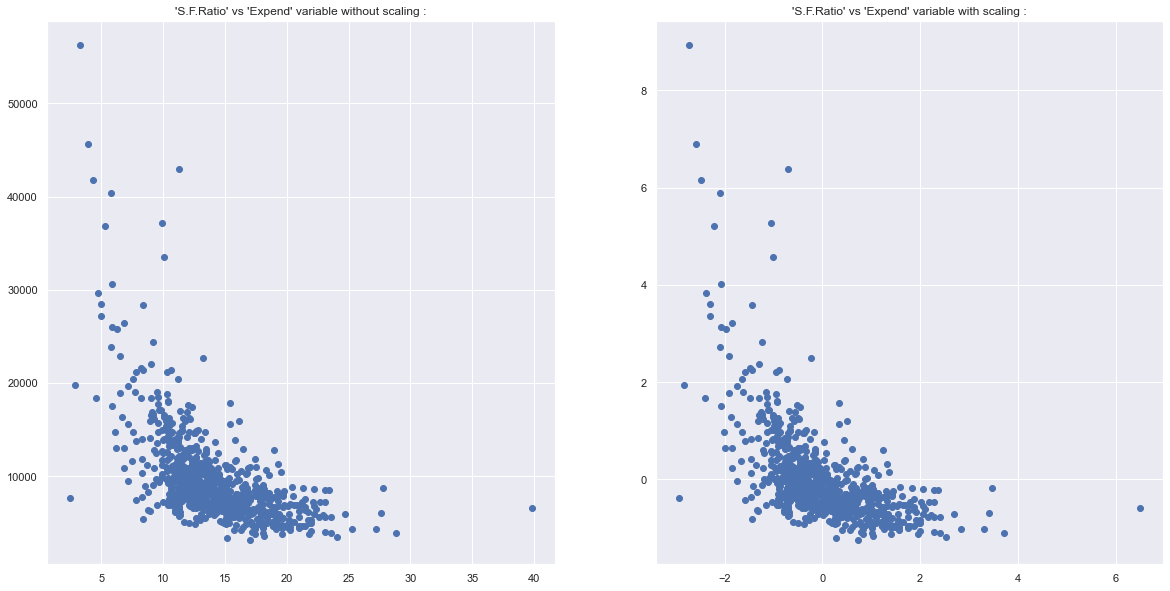

In [34]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.scatter(x = edu['S.F.Ratio'] , y = edu.Expend)
plt.title('\'S.F.Ratio\' vs \'Expend\' variable without scaling :')
plt.subplot(1,2,2)
plt.scatter(x = edu_zscale['S.F.Ratio'] , y = edu_zscale.Expend)
plt.title('\'S.F.Ratio\' vs \'Expend\' variable with scaling :')
printmd('**Observing the scatter plot for \'S.F.Ratio\' vs \'Expend\' with and without scaling :**')

## Inference:

* For understanding the larger picture of scaling on PCA, we can observe PCA in only two dimensions for example 'Expend' and 'S.F.Ratio'. If PCA is done here to reduce the two dimensions to one. In the scatter plot without scaling PCA will have much more dominance along the variance in the direction of Y-axis due to higher magnitude of 'Expend', whereas with scaling the effect of dominance will be less due to higher magnitude and more due to variation along the axes of principal components.

# 2.3 Comment on the comparison between the covariance and the correlation matrices from this data.[on scaled data]

In [35]:
from scipy.stats import zscore
from sklearn.decomposition import PCA

In [36]:
df_new = edu.apply(zscore)
df_new.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3 -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028 -0.115729   
1     0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646 -3.378176   
2    -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845 -0.931341   
3    -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206  1.175657   
4     0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672 -0.523535   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.013776    -0.867574 -0.501910  -0.318252  
1  -0.477704    -0.544572  0.166110  -0.551262  
2  -0.300749     0.585935 -0.177290  -0.667767  
3  -1.615274     1.151188  1.792851  -0.376504  
4  -0.553542    -1.675079  0.241803  -2.939613

## Covarince Matrix

In [37]:
printmd('**Covarince Matrix of the variables showing Covarince with each other :**')
cov_matrix = np.cov(df_new.T)
print('Covariance Matrix \n%s', cov_matrix)

**Covarince Matrix of the variables showing Covarince with each other :**

Covariance Matrix 
%s [[ 1.00128866  0.94466636  0.84791332  0.33927032  0.35209304  0.81554018
   0.3987775   0.05022367  0.16515151  0.13272942  0.17896117  0.39120081
   0.36996762  0.09575627 -0.09034216  0.2599265   0.14694372]
 [ 0.94466636  1.00128866  0.91281145  0.19269493  0.24779465  0.87534985
   0.44183938 -0.02578774  0.09101577  0.11367165  0.20124767  0.35621633
   0.3380184   0.17645611 -0.16019604  0.12487773  0.06739929]
 [ 0.84791332  0.91281145  1.00128866  0.18152715  0.2270373   0.96588274
   0.51372977 -0.1556777  -0.04028353  0.11285614  0.28129148  0.33189629
   0.30867133  0.23757707 -0.18102711  0.06425192 -0.02236983]
 [ 0.33927032  0.19269493  0.18152715  1.00128866  0.89314445  0.1414708
  -0.10549205  0.5630552   0.37195909  0.1190116  -0.09343665  0.53251337
   0.49176793 -0.38537048  0.45607223  0.6617651   0.49562711]
 [ 0.35209304  0.24779465  0.2270373   0.89314445  1.00128866  0.19970167
  -0.05364569  0.49002449  0.33191707  0.115676   -0.08091441

## Correlation Matrix

In [38]:
printmd('**Correlation Matrix of the variables showing correlation with each other :**')
edu.corr()

**Correlation Matrix of the variables showing correlation with each other :**

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

## Comparing Correlation and Covariance Matrix

In [39]:
df_ws = df_new.copy()
df_ws.corr()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

**Heatmap showing the correlation values between the variables :**

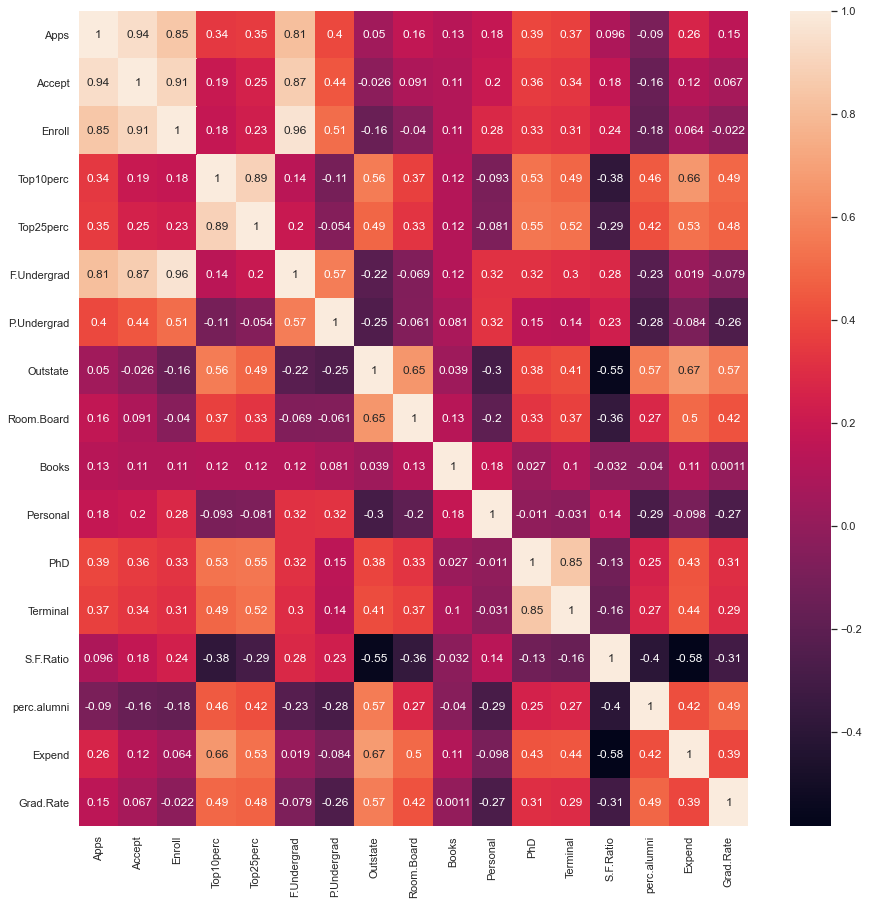

In [40]:
plt.figure(figsize = (15,15))
sns.heatmap(df_new.corr(), annot =True)
printmd('**Heatmap showing the correlation values between the variables :**')

**Showing scatter plots with good correlation :**

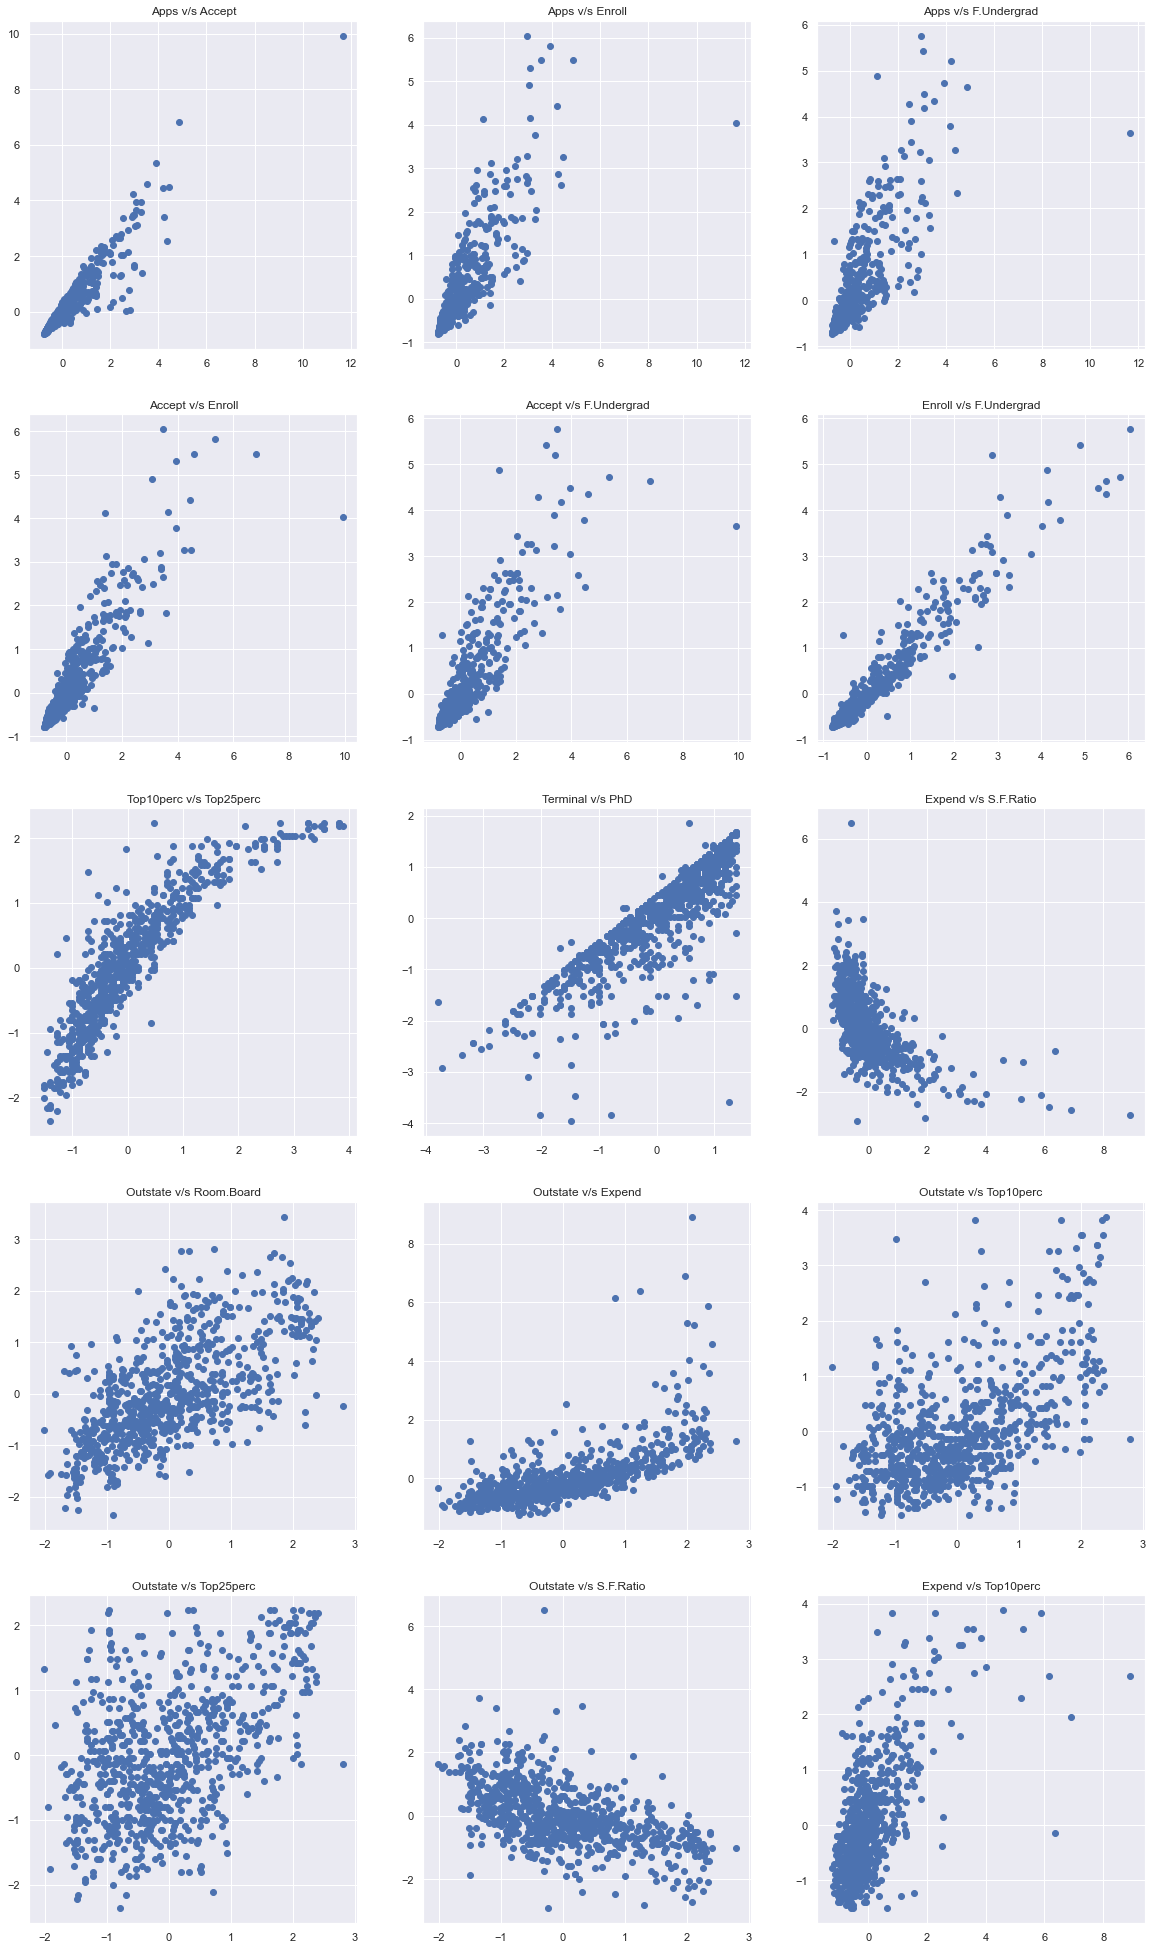

In [41]:
plt.figure(figsize=(20,35))
a = ['Apps','Apps','Apps', 'Accept', 'Accept', 'Enroll', 'Top10perc', 'Terminal',
              'Expend', 'Outstate','Outstate','Outstate','Outstate','Outstate','Expend' ]
b = ['Accept', 'Enroll', 'F.Undergrad', 'Enroll', 'F.Undergrad','F.Undergrad','Top25perc','PhD',
             'S.F.Ratio','Room.Board','Expend', 'Top10perc', 'Top25perc','S.F.Ratio','Top10perc']
count = 1
for i,j in zip(a,b):
    plt.subplot(5,3,count)
    plt.scatter(x = df_new[i], y = df_new[j])
    plt.title(str(i) + ' v/s ' + str (j))
    count = count + 1
printmd('**Showing scatter plots with good correlation :**')

## Inferences:

- There is strong positive correlation between 'Apps', 'Accept', 'Enroll' and 'F.Undergrad'. The logic behind the strong positive correlation between 'Apps', 'Accept' and 'Enroll' may be as number of applications increase, this implies more number of acceptance counts and hence more number of enrollments.
- There is strong positive correlation between 'Top10perc' and 'Top25perc'. The reason is the students present in the top 10% of higher secondary class are also present in top 25%.
- Also we can observe high positive correlation between 'Terminal' and 'PhD'. This may be because 'Terminal' degree holder is most probably also a PhD holder.
- There is a medium negative correlation observed between 'Expend' and 'S.F.Ratio'; the reason may be because higher Expend ratio means student pays higher instructional expenses but higher student to faculty ratio means more students per faculty. Thus as 'S.F.Ratio' will increase, the expenses shared by the students towards 'Expend' will decrease.
- There is medium positive correlation between 'Outstate' and 'Room.Board' and also between 'Outstate' and 'Expend'. The reason could be higher fees for public universities for out of state students.
- There is medium correlation between 'Outstate' and 'Top10perc', 'Outstate' and 'Top25perc'. The reason could be because the top 10% and top 25% students are distributed throughout the country.

## 2.4  Check the dataset for outliers before and after scaling. What insight do you derive here?

#### Checking outliers

In [42]:
edu_no_outlier = edu.copy()
edu_no_outlier.head()

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0  1660    1232     721         23         52         2885          537   
1  2186    1924     512         16         29         2683         1227   
2  1428    1097     336         22         50         1036           99   
3   417     349     137         60         89          510           63   
4   193     146      55         16         44          249          869   

   Outstate  Room.Board  Books  Personal  PhD  Terminal  S.F.Ratio  \
0      7440        3300    450      2200   70        78       18.1   
1     12280        6450    750      1500   29        30       12.2   
2     11250        3750    400      1165   53        66       12.9   
3     12960        5450    450       875   92        97        7.7   
4      7560        4120    800      1500   76        72       11.9   

   perc.alumni  Expend  Grad.Rate  
0           12    7041         60  
1           16   10527         56  
2           30    8735         54  
3           37   19016         59  
4            2   10922         15

**Before outlier treatment :**

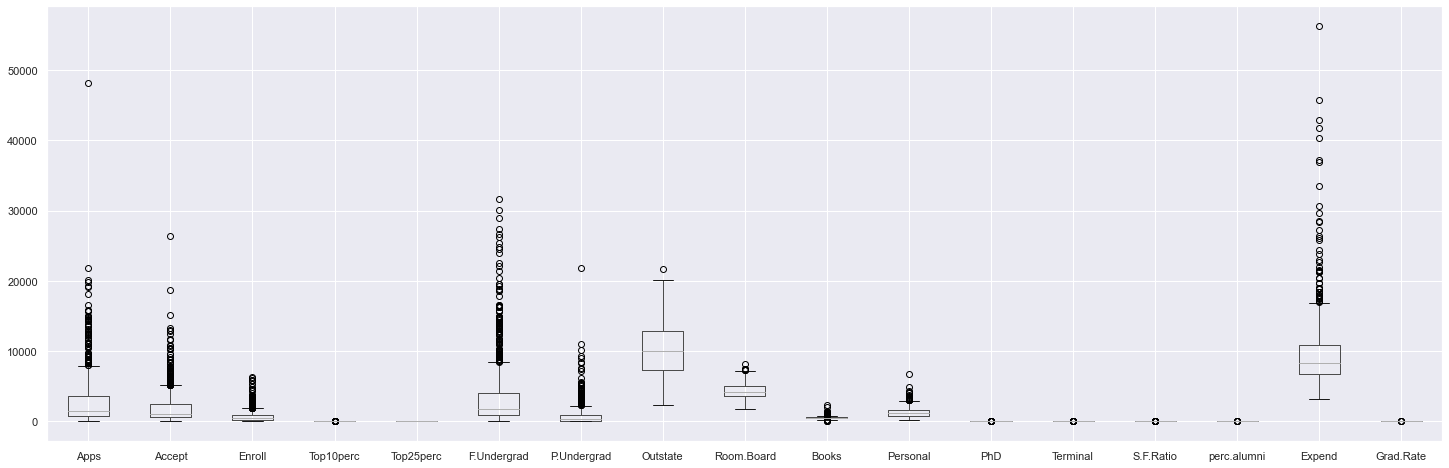

In [43]:
printmd('**Before outlier treatment :**')
edu.boxplot(figsize=(25,8));

#### Handling Outliers or Outlier Treatment

In [44]:
temp_scale_array = StandardScaler().fit_transform(edu_no_outlier)
edu_zscale_no_outlier = pd.DataFrame(temp_scale_array, columns = edu_no_outlier.columns)
printmd('**Output of first 5 rows of dataset after removal of Outliers and Standard scaling :**')
edu_zscale_no_outlier.head()

**Output of first 5 rows of dataset after removal of Outliers and Standard scaling :**

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3 -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028 -0.115729   
1     0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646 -3.378176   
2    -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845 -0.931341   
3    -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206  1.175657   
4     0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672 -0.523535   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.013776    -0.867574 -0.501910  -0.318252  
1  -0.477704    -0.544572  0.166110  -0.551262  
2  -0.300749     0.585935 -0.177290  -0.667767  
3  -1.615274     1.151188  1.792851  -0.376504  
4  -0.553542    -1.675079  0.241803  -2.939613

#### Checking outliers after handling them

In [45]:
def remove_outlier(xyz):
    sorted(xyz)
    Q1,Q3=xyz.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [46]:
df = edu.copy()

In [47]:
lrapps,urapps = remove_outlier(df['Apps'])
df['Apps'] = np.where(df['Apps'] > urapps,urapps,df['Apps'])
df['Apps'] = np.where(df['Apps'] < lrapps,lrapps,df['Apps'])
lraccept,uraccept = remove_outlier(df['Accept'])
df['Accept'] = np.where(df['Accept'] > uraccept,uraccept,df['Accept'])
df['Accept'] = np.where(df['Accept'] < lraccept,lraccept,df['Accept'])
lrenroll,urenroll = remove_outlier(df['Enroll'])
df['Enroll'] = np.where(df['Enroll'] > urenroll,urenroll,df['Enroll'])
df['Enroll'] = np.where(df['Enroll'] < lrenroll,lrenroll,df['Enroll'])
lrtop10perc,urtop10perc = remove_outlier(df['Top10perc'])
df['Top10perc'] = np.where(df['Top10perc'] > urtop10perc,urtop10perc,df['Top10perc'])
df['Top10perc'] = np.where(df['Top10perc'] < lrtop10perc,lrtop10perc,df['Top10perc'])
lrtop25perc,urtop25perc= remove_outlier(df['Top25perc'])
df['Top25perc'] = np.where(df['Top25perc'] > urtop25perc,urtop25perc,df['Top25perc'])
df['Top25perc'] = np.where(df['Top25perc'] < lrtop25perc,lrtop25perc,df['Top25perc'])
lrfundergrad,urfundergrad= remove_outlier(df['F.Undergrad'])
df['F.Undergrad'] = np.where(df['F.Undergrad'] > urfundergrad,urfundergrad,df['F.Undergrad'])
df['F.Undergrad'] = np.where(df['F.Undergrad'] < lrfundergrad,lrfundergrad,df['F.Undergrad'])
lrpundergrad,urpundergrad= remove_outlier(df['P.Undergrad'])
df['P.Undergrad'] = np.where(df['P.Undergrad'] > urpundergrad,urpundergrad,df['P.Undergrad'])
df['P.Undergrad'] = np.where(df['P.Undergrad'] < lrpundergrad,lrpundergrad,df['P.Undergrad'])
lroutstate,uroutstate= remove_outlier(df['Outstate'])
df['Outstate'] = np.where(df['Outstate'] > uroutstate,uroutstate,df['Outstate'])
df['Outstate'] = np.where(df['Outstate'] < lroutstate,lroutstate,df['Outstate'])
lrroomboard,urroomboard= remove_outlier(df['Room.Board'])
df['Room.Board'] = np.where(df['Room.Board'] > urroomboard,urroomboard,df['Room.Board'])
df['Room.Board'] = np.where(df['Room.Board'] < lrroomboard,lrroomboard,df['Room.Board'])
lrbooks,urbooks= remove_outlier(df['Books'])
df['Books'] = np.where(df['Books'] > urbooks,urbooks,df['Books'])
df['Books'] = np.where(df['Books'] < lrbooks,lrbooks,df['Books'])
lrpersonal,urpersonal= remove_outlier(df['Personal'])
df['Personal'] = np.where(df['Personal'] > urpersonal,urpersonal,df['Personal'])
df['Personal'] = np.where(df['Personal'] < lrpersonal,lrpersonal,df['Personal'])
lrphd,urphd= remove_outlier(df['PhD'])
df['PhD'] = np.where(df['PhD'] > urphd,urphd,df['PhD'])
df['PhD'] = np.where(df['PhD'] < lrphd,lrphd,df['PhD'])
lrterminal,urterminal= remove_outlier(df['Terminal'])
df['Terminal'] = np.where(df['Terminal'] > urterminal,urterminal,df['Terminal'])
df['Terminal'] = np.where(df['Terminal'] < lrterminal,lrterminal,df['Terminal'])
lrsfratio,ursfratio= remove_outlier(df['S.F.Ratio'])
df['S.F.Ratio'] = np.where(df['S.F.Ratio'] > ursfratio,ursfratio,df['S.F.Ratio'])
df['S.F.Ratio'] = np.where(df['S.F.Ratio'] < lrsfratio,lrsfratio,df['S.F.Ratio'])
lrpercalumni,urpercalumni= remove_outlier(df['perc.alumni'])
df['perc.alumni'] = np.where(df['perc.alumni'] > urpercalumni,urpercalumni,df['perc.alumni'])
df['perc.alumni'] = np.where(df['perc.alumni'] < lrpercalumni,lrpercalumni,df['perc.alumni'])
lrexpend,urexpend= remove_outlier(df['Expend'])
df['Expend'] = np.where(df['Expend'] > urexpend,urexpend,df['Expend'])
df['Expend'] = np.where(df['Expend'] < lrexpend,lrexpend,df['Expend'])
lrgradrate,urgradrate= remove_outlier(df['Grad.Rate'])
df['Grad.Rate'] = np.where(df['Grad.Rate'] > urgradrate,urgradrate,df['Grad.Rate'])
df['Grad.Rate'] = np.where(df['Grad.Rate'] < lrgradrate,lrgradrate,df['Grad.Rate'])

**After outlier treatment :**

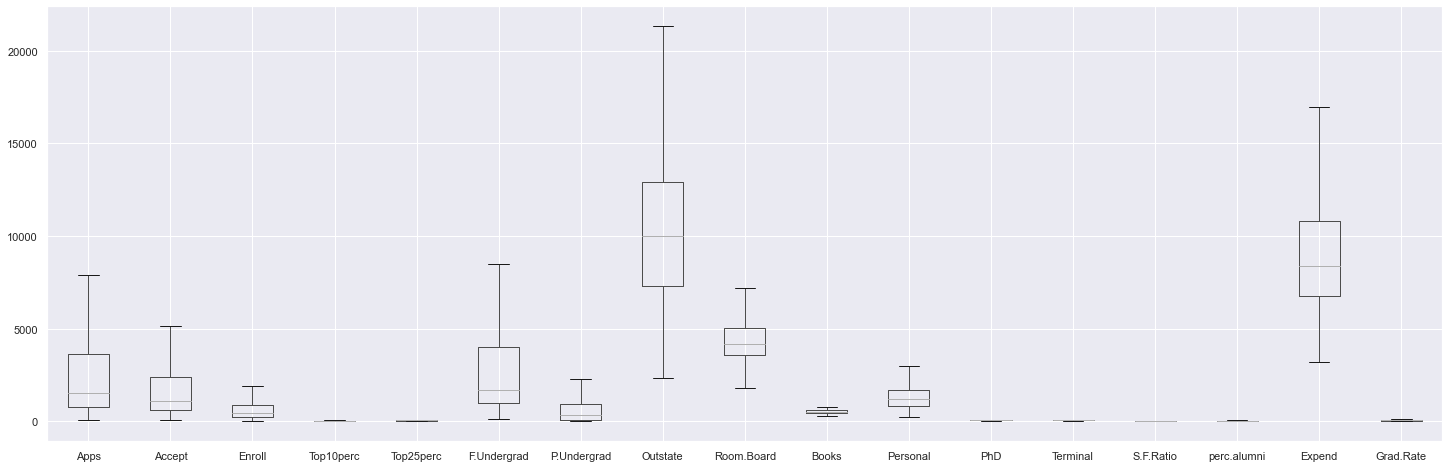

In [48]:
printmd('**After outlier treatment :**')
df.boxplot(figsize=(25,8));

# 2.5  Extract the eigenvalues and eigenvectors.[print both]

In [49]:
eig_values, eig_vectors = np.linalg.eig(cov_matrix)
printmd('**Eigen Values of the Covariance Matrix are as follows :**')
print(eig_values)
printmd('**Eigen vectors of the Covariance Matrix for corresponding Eigen values are as follows :**')
print(eig_vectors)

**Eigen Values of the Covariance Matrix are as follows :**

[5.45052162 4.48360686 1.17466761 1.00820573 0.93423123 0.84849117
 0.6057878  0.58787222 0.53061262 0.4043029  0.02302787 0.03672545
 0.31344588 0.08802464 0.1439785  0.16779415 0.22061096]


**Eigen vectors of the Covariance Matrix for corresponding Eigen values are as follows :**

[[-2.48765602e-01  3.31598227e-01 -6.30921033e-02  2.81310530e-01
  -5.74140964e-03 -1.62374420e-02 -4.24863486e-02  1.03090398e-01
   9.02270802e-02 -5.25098025e-02  3.58970400e-01 -4.59139498e-01
   4.30462074e-02 -1.33405806e-01  8.06328039e-02 -5.95830975e-01
   2.40709086e-02]
 [-2.07601502e-01  3.72116750e-01 -1.01249056e-01  2.67817346e-01
  -5.57860920e-02  7.53468452e-03 -1.29497196e-02  5.62709623e-02
   1.77864814e-01 -4.11400844e-02 -5.43427250e-01  5.18568789e-01
  -5.84055850e-02  1.45497511e-01  3.34674281e-02 -2.92642398e-01
  -1.45102446e-01]
 [-1.76303592e-01  4.03724252e-01 -8.29855709e-02  1.61826771e-01
   5.56936353e-02 -4.25579803e-02 -2.76928937e-02 -5.86623552e-02
   1.28560713e-01 -3.44879147e-02  6.09651110e-01  4.04318439e-01
  -6.93988831e-02 -2.95896092e-02 -8.56967180e-02  4.44638207e-01
   1.11431545e-02]
 [-3.54273947e-01 -8.24118211e-02  3.50555339e-02 -5.15472524e-02
   3.95434345e-01 -5.26927980e-02 -1.61332069e-01  1.22678028e-01
  -3.41099863e-01 -

#### Significance of Eigenvectors:
* The eigenvectors in PCA are the directions in feature space along which the data vary the most. They are the coordinate axes of the new feature space formed after PCA. Each eigenvector direction is orthogonal to the other eigenvectors. The corresponding coefficients of a particular eigenvector are the loadings corresponding to each of the variables of the original dataset, if the eigenvectors are calculated for a covariance matrix of a standard scaled (z-scaled) data then these coefficients may be considered to be the correlations with the variables of the original dataset.

## 2.6 Perform PCA and export the data of the Principal Component (eigenvectors) into a data frame with the original features

In [50]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Explicit form of the first PC in terms of Eigen Vectors \n %s', eig_vecs)

Explicit form of the first PC in terms of Eigen Vectors 
 %s [[-2.48765602e-01  3.31598227e-01 -6.30921033e-02  2.81310530e-01
  -5.74140964e-03 -1.62374420e-02 -4.24863486e-02  1.03090398e-01
   9.02270802e-02 -5.25098025e-02  3.58970400e-01 -4.59139498e-01
   4.30462074e-02 -1.33405806e-01  8.06328039e-02 -5.95830975e-01
   2.40709086e-02]
 [-2.07601502e-01  3.72116750e-01 -1.01249056e-01  2.67817346e-01
  -5.57860920e-02  7.53468452e-03 -1.29497196e-02  5.62709623e-02
   1.77864814e-01 -4.11400844e-02 -5.43427250e-01  5.18568789e-01
  -5.84055850e-02  1.45497511e-01  3.34674281e-02 -2.92642398e-01
  -1.45102446e-01]
 [-1.76303592e-01  4.03724252e-01 -8.29855709e-02  1.61826771e-01
   5.56936353e-02 -4.25579803e-02 -2.76928937e-02 -5.86623552e-02
   1.28560713e-01 -3.44879147e-02  6.09651110e-01  4.04318439e-01
  -6.93988831e-02 -2.95896092e-02 -8.56967180e-02  4.44638207e-01
   1.11431545e-02]
 [-3.54273947e-01 -8.24118211e-02  3.50555339e-02 -5.15472524e-02
   3.95434345e-01 -5.269

In [51]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 17)
new_dimension_variable = pca.fit_transform(edu_zscale_no_outlier)

In [52]:
pc = pca.components_[0]
printmd('**Eigen Vector corresponding to maximum Eigen value :**')
print(pc)

**Eigen Vector corresponding to maximum Eigen value :**

[ 0.2487656   0.2076015   0.17630359  0.35427395  0.34400128  0.15464096
  0.0264425   0.29473642  0.24903045  0.06475752 -0.04252854  0.31831287
  0.31705602 -0.17695789  0.20508237  0.31890875  0.25231565]


## 2.7 Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only).

In [53]:
printmd('**explicit form of the first PC in terms of the eigenvectors in two places of decimals :**')
var=np.cumsum(np.round(pc, decimals=2)*100)
var

**explicit form of the first PC in terms of the eigenvectors in two places of decimals :**

array([ 25.,  46.,  64.,  99., 133., 148., 151., 180., 205., 211., 207.,
       239., 271., 253., 274., 306., 331.])

In [54]:
printmd('**Columns of dataset :**')
edu.columns

**Columns of dataset :**

Index(['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad',
       'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD',
       'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate'],
      dtype='object')

* Explicit form of first PC = (25 * Apps) + (46 * Accept) + (64 * Enroll) + (99 * Top10perc) + (133 * Top25perc) + (148 * F.Undergrad) + (151 * P.Undergrad) + (180 *Outstate) + (205 * Room.Board) + (211 * Books) + (207 * Personal) + (239* PhD) + (271 * Terminal) + (253 * S.F.Ratio) + (274 * perc.alumni) + (306 * Expend) + (331 * Grad.Rate) 

## 2.8  Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?

In [72]:
printmd('**Explained variance by each principal component shown in decreasing order**')
print(pca.explained_variance_ratio_)

**Explained variance by each principal component shown in decreasing order**

[0.32020628 0.26340214 0.06900917 0.05922989]


## Inference:

* The above values are the eigen values of the covariance matrix which show the variance captured by each principal component in decreasing order.
* The first 4 principal components capture individually greater than a variance value of 1.

## Scree plot

**Scree Plot :**

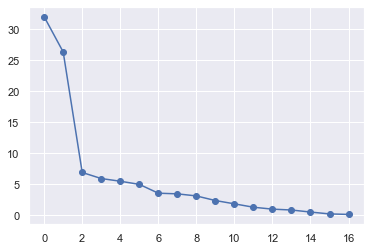

In [56]:
tot = sum(pca.explained_variance_)
var_exp = [( i /tot ) * 100 for i in (pca.explained_variance_)]
plt.plot(var_exp, marker = 'o')
printmd('**Scree Plot :**')

## Inference:
* Shows the the individual explained variances by the principal components.
* We can observe a sudden decrease in slope from the third principal component onwards. This means the maximum variances are captured by the first two principal components. This point is also called inflection point.

In [57]:
cum_var_exp = np.cumsum(pca.explained_variance_)
printmd('**Cumulative Variance (in absolute terms) Explained by the principal components starting from first principal component :**')
print(cum_var_exp)

**Cumulative Variance (in absolute terms) Explained by the principal components starting from first principal component :**

[ 5.45052162  9.93412848 11.1087961  12.11700183 13.05123305 13.89972422
 14.50551203 15.09338425 15.62399687 16.02829977 16.34174565 16.56235661
 16.73015077 16.87412926 16.9621539  16.99887935 17.02190722]


In [58]:
cum_var_exp = np.cumsum(var_exp)
printmd('**Cumulative Variance (in percentage terms) Explained by the principal components starting from first principal component :**')
print(cum_var_exp)

**Cumulative Variance (in percentage terms) Explained by the principal components starting from first principal component :**

[ 32.0206282   58.36084263  65.26175919  71.18474841  76.67315352
  81.65785448  85.21672597  88.67034731  91.78758099  94.16277251
  96.00419883  97.30024023  98.28599436  99.13183669  99.64896227
  99.86471628 100.        ]


## Inference:
* The first two principal components capture approximately 62% of the total variance.
* There is sudden drop in variance captured after second principal component.
* 90% of the total variance is captured by first 8 principal components.
* After the first 11 principal components there is less than 1% increase in variance captured consecutively by the remaining principal components.

**Cumulative and Individual explained variance in a single plot :**

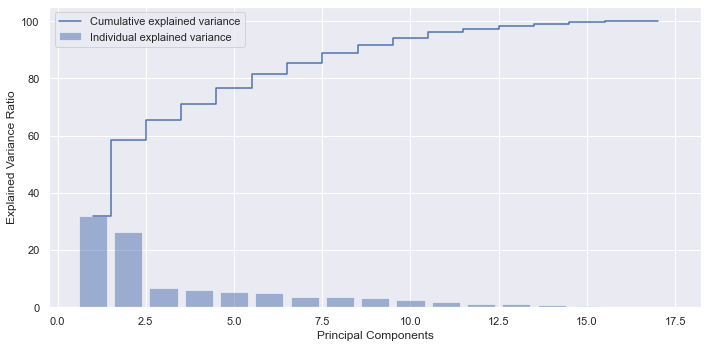

In [59]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, pca.explained_variance_.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, pca.explained_variance_.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
printmd('**Cumulative and Individual explained variance in a single plot :**')
plt.show()

## Inference:
* A combination of Individual and cumulative explained variance together. We can see that the first two principal components cover more than 60% of the explained variance and also the first two principal components individually explain much more variance as compared to the other principal components.

## Final Inferences from the above PCA:
* PCA captures maximum possible variance of the original variables with minimum number of dimensions. There are different methods employed to capture the optimum information with minimum dimensions. One of the most common method is using the cumulative values of the eigenvalues for deciding the optimum value. For better visualistion we convert the cumulative values in percentage terms first then we decide on the minimum amount of information we want to capture in our new dimensions and based on this select up to the principal components that explain the desired percentage of variance. For example in our case if we want minimum 90% of the variance explained by the new dimensions, we select the first 8 principle components which explain approximately 90.79% of the variance.
* Some of the other methods employed for the purpose of selection of optimum number of principal components are Kraizer rule, where we consider all the principal components with eigen values greater than 1. And Scree plot, where we accept only up to the principal component previous to the inflection point (i.e. a sharp break in slope).

## Principal Component Scores:
* There are as many principal components, as the number of variables used from the dataset for PCA. Each object in the dataset is described by all these variables. A principal component score is the score of a particular object for a particular principal component obtained by multiplying the values of the variables for the object with the corresponding coefficients/loadings of that particular principal component and adding them up.
* In our dataset there are 17 variables for PCA and hence 17 principal components. There are 777 rows and hence 777 objects which are described by these 17 variables. So there will be (17 * 777) principal component scores one each for a object for a particular principal component.
* These scores are shown below in a dataframe.


## 2.6

In [60]:
print('Shape of the transformed dataset with new dimension variables is : ', new_dimension_variable.shape)
printmd('**The transformed data set in array form as obtained after PCA is :**')
new_dimension_variable

Shape of the transformed dataset with new dimension variables is :  (777, 17)


**The transformed data set in array form as obtained after PCA is :**

array([[-1.59285540e+00,  7.67333510e-01, -1.01073537e-01, ...,
         1.75239502e-03, -9.31400698e-02,  9.35522023e-02],
       [-2.19240180e+00, -5.78829984e-01,  2.27879812e+00, ...,
         1.03709803e-01, -5.02556890e-02, -1.74057054e-01],
       [-1.43096371e+00, -1.09281889e+00, -4.38092811e-01, ...,
        -2.25582869e-02, -4.05268301e-03,  3.75875882e-03],
       ...,
       [-7.32560596e-01, -7.72352397e-02, -4.05641899e-04, ...,
         6.79013123e-02, -2.32023970e-01, -9.99380421e-02],
       [ 7.91932735e+00, -2.06832886e+00,  2.07356368e+00, ...,
         3.53597440e-01,  3.04416200e-01,  3.35104811e-01],
       [-4.69508066e-01,  3.66660943e-01, -1.32891515e+00, ...,
        -1.14873492e-01, -1.17076127e-01, -2.57218339e-03]])

In [61]:
# Converting to DataFrame
new_dimension_df = pd.DataFrame(new_dimension_variable, columns=['pc1_scores', 'pc2_scores','pc3_scores', 'pc4_scores', 'pc5_scores',
                                                                  'pc6_scores', 'pc7_scores','pc8_scores', 'pc9_scores', 'pc10_scores',
                                                                  'pc11_scores', 'pc12_scores','pc13_scores', 'pc14_scores', 'pc15_scores',
                                                                  'pc16_scores', 'pc17_scores'])


printmd('**Principal Component Scores :**')
new_dimension_df.head()

**Principal Component Scores :**

pc1_scores  pc2_scores  pc3_scores  pc4_scores  pc5_scores  pc6_scores  \
0   -1.592855    0.767334   -0.101074   -0.921749   -0.743975   -0.298306   
1   -2.192402   -0.578830    2.278798    3.588918    1.059997   -0.177137   
2   -1.430964   -1.092819   -0.438093    0.677241   -0.369613   -0.960592   
3    2.855557   -2.630612    0.141722   -1.295486   -0.183837   -1.059508   
4   -2.212008    0.021631    2.387030   -1.114538    0.684451    0.004918   

   pc7_scores  pc8_scores  pc9_scores  pc10_scores  pc11_scores  pc12_scores  \
0    0.638443   -0.879386    0.093084     0.048593     0.399747    -0.089690   
1    0.236753    0.046925    1.113780     0.965154    -0.212509     0.097239   
2   -0.248276    0.308740   -0.105452     0.640660    -0.154993    -0.344731   
3   -1.249356   -0.147694    0.378997     0.461244    -0.420651     0.687143   
4   -2.159220   -0.624413   -0.160383     0.363428    -0.153339    -0.050552   

   pc13_scores  pc14_scores  pc15_scores  pc16_scores  pc17_scores  
0    -0.052098     0.180140     0.001752    -0.093140     0.093552  
1    -0.243518    -0.744204     0.103710    -0.050256    -0.174057  
2     0.097551     0.227527    -0.022558    -0.004053     0.003759  
3    -0.075461    -0.003380    -0.073181    -0.191546    -0.175254  
4     0.267207    -0.614409    -0.273993     0.010653     0.048344

## Conclusion:
* We can select 8 out of the 17 new dimensions now to explain 90.79% of the variance and reduce the dimensionality of the dataset accordingly.

## 2.9 Explain the business implication of using the Principal Component Analysis for this case study. How may PCs help in the further analysis? [Hint: Write Interpretations of the Principal Components Obtained]

In [62]:
df_new = edu.apply(zscore)
df_new.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3 -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028 -0.115729   
1     0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646 -3.378176   
2    -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845 -0.931341   
3    -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206  1.175657   
4     0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672 -0.523535   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.013776    -0.867574 -0.501910  -0.318252  
1  -0.477704    -0.544572  0.166110  -0.551262  
2  -0.300749     0.585935 -0.177290  -0.667767  
3  -1.615274     1.151188  1.792851  -0.376504  
4  -0.553542    -1.675079  0.241803  -2.939613

In [63]:
pca = PCA(n_components=4)
data_reduced = pca.fit_transform(df_new)
data_reduced.transpose()

array([[-1.59285540e+00, -2.19240180e+00, -1.43096371e+00, ...,
        -7.32560595e-01,  7.91932735e+00, -4.69508066e-01],
       [ 7.67333510e-01, -5.78829984e-01, -1.09281889e+00, ...,
        -7.72352383e-02, -2.06832884e+00,  3.66660941e-01],
       [-1.01073506e-01,  2.27879801e+00, -4.38092735e-01, ...,
        -4.05155412e-04,  2.07356610e+00, -1.32891543e+00],
       [-9.21748412e-01,  3.58891678e+00,  6.77241969e-01, ...,
         5.43263870e-02,  8.52094940e-01, -1.08026750e-01]])

In [64]:
pca.components_

array([[ 0.2487656 ,  0.2076015 ,  0.17630359,  0.35427395,  0.34400128,
         0.15464096,  0.0264425 ,  0.29473642,  0.24903045,  0.06475752,
        -0.04252854,  0.31831287,  0.31705602, -0.17695789,  0.20508237,
         0.31890875,  0.25231565],
       [ 0.33159823,  0.37211675,  0.40372425, -0.08241182, -0.04477866,
         0.41767377,  0.31508783, -0.24964352, -0.13780888,  0.05634184,
         0.21992922,  0.05831132,  0.04642945,  0.24666528, -0.24659527,
        -0.13168987, -0.16924053],
       [-0.06309195, -0.10124909, -0.08298562,  0.03505583, -0.02414819,
        -0.06139304,  0.13968174,  0.04659884,  0.1489674 ,  0.67741164,
         0.49972113, -0.12702846, -0.06603742, -0.28984841, -0.14698925,
         0.22674388, -0.20806466],
       [ 0.28131352,  0.26781679,  0.16182573, -0.05154111, -0.1097718 ,
         0.10041097, -0.15855806,  0.1312906 ,  0.18499622,  0.08708899,
        -0.23071042, -0.53472677, -0.51944052, -0.16118964,  0.01731472,
         0.07927144

In [65]:
pca.explained_variance_ratio_

array([0.32020628, 0.26340214, 0.06900917, 0.05922989])

In [66]:
var2=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var2

array([32. , 58.3, 65.2, 71.1])

In [67]:
df_comp = pd.DataFrame(pca.components_,columns=list(df_new))
df_comp.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0  0.248766  0.207602  0.176304   0.354274   0.344001     0.154641   
1  0.331598  0.372117  0.403724  -0.082412  -0.044779     0.417674   
2 -0.063092 -0.101249 -0.082986   0.035056  -0.024148    -0.061393   
3  0.281314  0.267817  0.161826  -0.051541  -0.109772     0.100411   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0     0.026443  0.294736    0.249030  0.064758 -0.042529  0.318313  0.317056   
1     0.315088 -0.249644   -0.137809  0.056342  0.219929  0.058311  0.046429   
2     0.139682  0.046599    0.148967  0.677412  0.499721 -0.127028 -0.066037   
3    -0.158558  0.131291    0.184996  0.087089 -0.230710 -0.534727 -0.519441   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0  -0.176958     0.205082  0.318909   0.252316  
1   0.246665    -0.246595 -0.131690  -0.169241  
2  -0.289848    -0.146989  0.226744  -0.208065  
3  -0.161190     0.017315  0.079271   0.269129

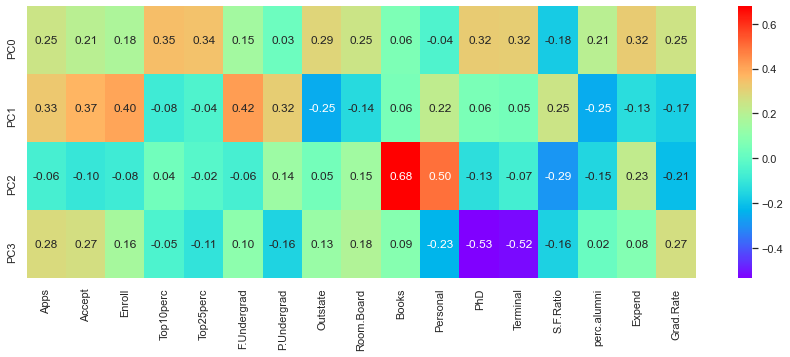

In [68]:
plt.figure(figsize=(15,5))
sns.heatmap(df_comp,cmap='rainbow', annot=True,fmt='.2f',yticklabels=['PC0','PC1','PC2','PC3'])
plt.show()

* In our case study, after performing multivariate analysis we have observed that many of the variables are correlated. Thus we don't need all these variables for analysis but we are not sure which variables to drop and which to select, hence we perform PCA, which captures the information (in the form of variance) from all these variables into new dimension variables. Now based on the requirement of information we can select the number of new dimension variables required.
* The new dimension variables are independent of each other, which also helps in certain algorithms.
* The dimensionality reduction as obtained from PCA helps in lesser computing power, i.e. faster processing for further analysis.
* The dimensionality reduction also helps in lesser storage space.
* The dimensionality reduction also helps in addressing the overfitting issue, which mainly occurs when there are too many variables.

### Thank you